<a href="https://colab.research.google.com/github/jaksondeoliveiramartins/AI-Bolsa-de-valores/blob/main/Aula_de_Python_com_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aula de Python com AI


In [ ]:
#Criar uma IA que eu vou na internet ou preciso digitalizar algo.
#pegar um link de uma imagem do google que eu quero traduzir


In [ ]:
#bibliotecas são como livros que você consulta para ciar coisas.
!pip install easyocr
!pip install spacy
!python -m spacy download pt_core_news_sm

In [ ]:
import easyocr
import spacy
def extract_text_from_handwritten_image(image_path):
  reader=easyocr.Reader(['pt'],model_storage_directory='.',download_enabled=True)
  results=reader.readtext(image_path,paragraph=True)

  text=''
  for results in results:
      text+=results[1] + '\n'
      return text
image_path='https://lh3.googleusercontent.com/B0nJJ9PEkH8s6OCpfzd5XLtBFHDt325vC2NOi__TvAJlTkCUAus8OVCo_kcl2cEAzuadRZ_Sa-l6kmMmH9P4aNjFACbuyBZYnbouVWNjyuvdc2jEGc6WXCoZIP5_Uzk2riTY6y5yMfI'
extracted_text=extract_text_from_handwritten_image(image_path)
print(extracted_text)


AI bolsa de Valores.


In [ ]:
#Vamos precisar de pegar os dados de algum lugar e fazer a analise a partir disso
#bolsa de valores do google(AlphaBet)
!pip install yfinance


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import  Dense, LSTM
from tensorflow.keras.optimizers import Adam
ticker="GOOGL"
data=yf.download(ticker,start = "2022-01-01",end="2023-10-01")
scaler=MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))

#Dividindo os dados em conjunto de treinamento
train_data=scaled_data[0:int(len(scaled_data)*0.8),:]


x_train,y_train=[],[]
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

x_train,y_train=np.array(x_train), np.array(y_train)
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#Constuindo o Modelo LSTM
model=Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))



Epoch 1/100
10/10 [==============================] - 6s 51ms/step - loss: 0.0019
Epoch 2/100
10/10 [==============================] - 0s 49ms/step - loss: 0.0019
Epoch 3/100
10/10 [==============================] - 1s 50ms/step - loss: 0.0017
Epoch 4/100
10/10 [==============================] - 1s 50ms/step - loss: 0.0019
Epoch 5/100
10/10 [==============================] - 1s 50ms/step - loss: 0.0017
Epoch 6/100
10/10 [==============================] - 0s 49ms/step - loss: 0.0018
Epoch 7/100
10/10 [==============================] - 1s 53ms/step - loss: 0.0016
Epoch 8/100
10/10 [==============================] - 0s 48ms/step - loss: 0.0018
Epoch 9/100
10/10 [==============================] - 1s 51ms/step - loss: 0.0016
Epoch 10/100
10/10 [==============================] - 0s 49ms/step - loss: 0.0020
Epoch 11/100
10/10 [==============================] - 1s 50ms/step - loss: 0.0026
Epoch 12/100
10/10 [==============================] - 1s 50ms/step - loss: 0.0022
Epoch 13/100
10/10 [=====

<ipython-input-18-4bac79124e27>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


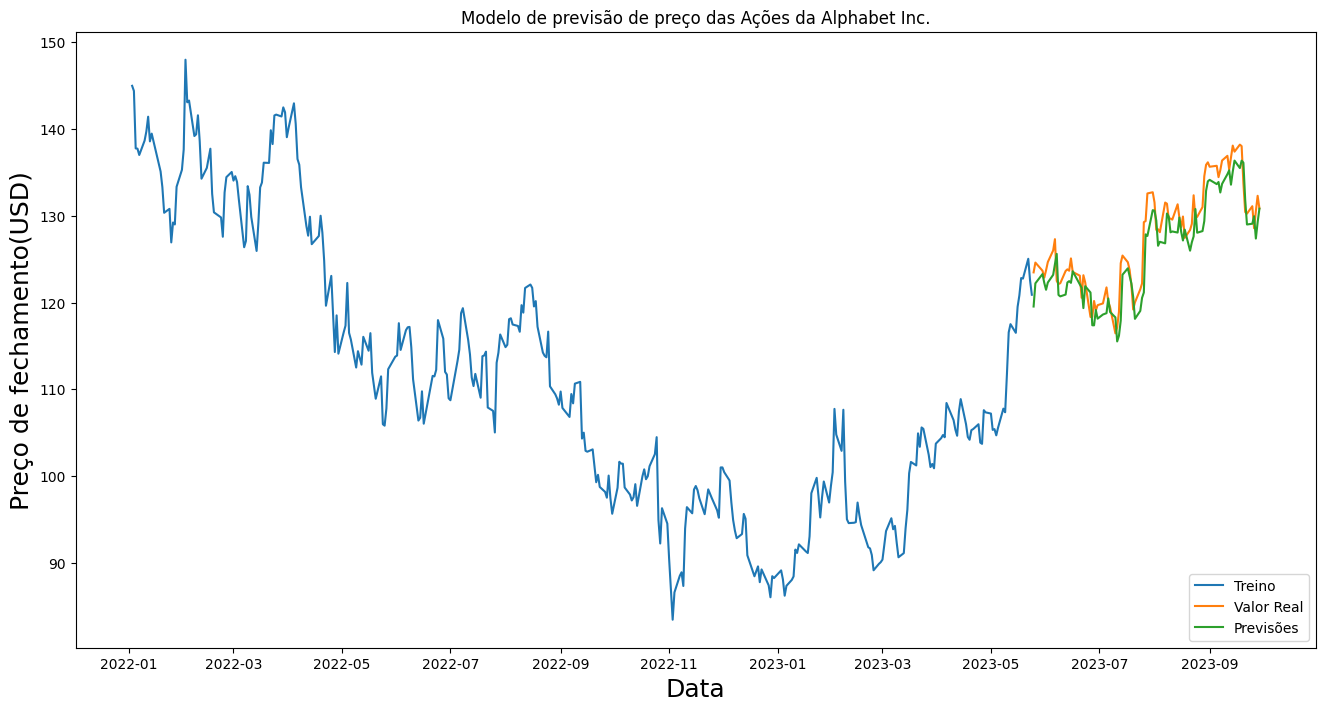

In [18]:
from IPython.testing import test
# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Treinar o modelo
history = model.fit(x_train, y_train, batch_size=32, epochs=100)

# Testando o modelo
test_data = scaled_data[int(len(scaled_data)*0.8) - 60:, :]
x_test=[]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))

#fazendo previsões
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

#plotando os resultados
train=data[:int(len(scaled_data)*0.8)]
valid=data[int(len(scaled_data)*0.8):]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title("Modelo de previsão de preço das Ações da Alphabet Inc.")
plt.xlabel("Data",fontsize=18)
plt.ylabel("Preço de fechamento(USD)",fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Treino','Valor Real','Previsões'], loc='lower right')
plt.show()


